### College of Computing and Informatics, Drexel University
### INFO 212: Data Science Programming I, Spring 2018
---

## Final Project Report

## Project Title: Russian Troll Tweets 

## Student(s): Ngan Phan and Jasdeep Glamour

#### Date: 6/7/2018
---

#### Abstract
---

Our project is to look at the Russian Troll Tweets dataset during the 2016 election. It includes two csv's file, one is tweets.csv contains 200,000 tweets, and other file is users.csv contains 3,000 users. The problem is that the data itself has a lot of missing or incomplete data, so cleaning the data will be necessary.Our goal is to disect the Russian Troll Tweets and try to understand if the those tweets has shaped the election. After cleaning, wrangling and visualizing the data, we can make two statements. The first that the data collected might of included non-Russian accounts. Second, that there was definitely a Russian influence on twitter in reference to the election. 

### 1. Introduction
---

#### Intro <br>
The dataset we chose is about the  Russian Tweets During the 2016 election. About 200,000 tweet by about 3,000 users were collected by NBC, to analyzed and try to develop characteristics about Russian Tweets. The data collected was broken into two csv’s, the first users.csv contains the 3,000 users associated with Tweets and tweets.csv which contains the 200,000 tweets. As for the data itself it has a great deal of missing and incomplete data. Each row in tweets.csv has missing or incomplete data in it. 

#### Objectives<br>
The objective of this project is to analyze the tweets and users, to see if there’s any shared common characteristics among the users and  Russian Tweets. So, in future election we can use this data to predict and mitigate future social media attacks. This data can also be used to see if any outside influences or large corporation are trying to sway the general public’s view on certain topics related or unrelated to politics. 
Using libraries such as word cloud, plotly, and pandas we will be visualizing data relating to the most used words in tweets, most popular hashtags,  and when the tweets were tweeted. In relation to the user we will be looking at where the user is from, when the account were created, their friend count and so on. We will create word clouds based on location/date account created and the most common used words. Looking at the most popular topics people are tweeting along with the date. A few examples of how we will clean the dataset are removing all  emojis /other special characters and moving them to another  column for analysis, and by replacing all the empty data in retweets_count and replacing it with 0’s and replacing all categorical data with a numerical scale.
<br> <br>
During the analysis of the Twitter dataset, we hope to have a better understanding of what Russian “Troll Tweet” is and how to identify it. Also, we hope to analyze and understand if the dataset we chose truly focused solely on Russian Tweets and user accounts. 

### 2. Problem Definition
---

As Witnessed in the previous election Russia played a big role in the outcome of the election. Russia used social media platforms such as Twitter in influence voters views on the candidates in the election. Our goal is to disect Russian tweets during the 2016 election to try and understand the tweets that shaped the election. We would like to see if the tweets share any characteristics, so that in the future it will be easier to identify these tweets and filter them out. 
There isn't one specific stakeholder, but the American public along with socials media platforms would greatly benefit from this project.

As far as the data goes, a great deal of cleaning will be necessary as stated earlier. 

### 3. Data Sources
---

The data source is a csv of Russian Troll Tweets that may have influenced the 2016 election. The accounts included in the 
dataset were released by twitter. The data is broken up into two files tweets.csv contains the 200,000 tweets released by twitter and the user.csv contains the almost 3,000 'Russian' accounts. The data can be downloaded from the following link: https://www.kaggle.com/vikasg/russian-troll-tweets.

### 4. Acquiring and Loading Data
---

## Import all dependencies
<h3 style="color:red; font-weight:bold; text-decoration: underline">If the Google Translate py package is not already installed run the following command to install it: `pip install googletrans` </div>

In [25]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates
from wordcloud import WordCloud
from datetime import datetime
from googletrans import Translator
%matplotlib inline

In [26]:
#import data
twitter_user = pd.read_csv('./datasets/users.csv')
tweets = pd.read_csv('./datasets/tweets.csv')

### 5. Wrangling and Cleansing Data
---


### Clean Twitter_user dataframe

In [27]:
#view missing data
missing_user_df = twitter_user.isnull().sum(axis=0)
missing_user_df

id                   61
location            169
name                 70
followers_count      70
statuses_count       70
time_zone            85
verified             70
lang                 70
screen_name           0
description         115
created_at           70
favourites_count     70
friends_count        70
listed_count         70
dtype: int64

In [28]:
#remove missing data if the location is missing
twitter_user.dropna(subset=['location'], inplace=True)

In [29]:
#Replace null values in description with phrase "no description"
twitter_user['description'].fillna('no description', inplace=True)

In [30]:
twitter_user.dropna(subset=['time_zone'], inplace=True)
twitter_user.isnull().sum(axis=0)

id                  0
location            0
name                0
followers_count     0
statuses_count      0
time_zone           0
verified            0
lang                0
screen_name         0
description         0
created_at          0
favourites_count    0
friends_count       0
listed_count        0
dtype: int64

### Twitter_user data wrangling

#### Reformating created_str to month and year columns

In [31]:
current_date = '%a %b %d %H:%M:%S %z %Y'
month = '%m'
year = '%Y'
twitter_user['month'] = (twitter_user.created_at.map(
    lambda x: datetime.strptime(str(x), current_date).strftime(month)))
twitter_user['year'] = (twitter_user.created_at.map(
    lambda x: datetime.strptime(str(x), current_date).strftime(year)))

#### Translate description, location, and usernames to english

In [32]:
# for the location column, look at all the text first identify all the non-english language, add all the
#language types to the language array and then convert everything to english
language_count = []
translator = Translator()
i = 0;
for location in twitter_user['location'].values:
#first detect the language
    lang_detect = translator.detect(location)
#if the language isn't english, translate it to english
    if(lang_detect.lang != 'en'):
        translation = translator.translate(location, dest='en')
        twitter_user['location'].values[i] = translation.text
    i = i+1

### Consolidate locations to the same name 
Example 'Moscow, Russia' and 'Moscow' should both be 'Moscow'

The country can be removed by removing the sub string after the comma

In [33]:
# in the location column consolidate locations to the same name 
# example 'Moscow, Russia' and 'Moscow' should both be 'Moscow'
# The country can be removed by removing the sub string after the comma
i = 0 
for location in twitter_user['location'].values:
    head, sep, tail = location.partition(',')
    twitter_user['location'].values[i] = head
    i = i+1

#### Replace all 'us' labels with 'United States of America'

In [34]:
twitter_user['location'].replace({'USA':'United States of America',
                                  'usa':'United States of America',
                                  'US':'United States of America',
                                  'us':'United States of America',
                                  'United States':'United States of America',
                                  'united state':'United States of America', 
                                  'America':'United States of America',
                                  'america':'United States of America', 
                                  'murica':'United States of America', 
                                  'Murica':'United States of America',
                                  'united states of america':'United States of America'}, inplace = True)

#### Change descriptions to english

In [35]:
translator = Translator()
i = 0;
for description in twitter_user['description'].values:
#first detect the language
    lang_detect = translator.detect(description)
#if the language isn't english, translate it to english
    if(lang_detect.lang != 'en'):
        translation = translator.translate(description, dest='en')
        twitter_user['description'].values[i] = translation.text
    i = i+1

### Clean Tweets dataframe

In [36]:
#remove unneeded columns such as: user_id, created_at (created_str is the same thing but in timedate format), and tweet_id
tweets.drop(columns=['user_id', 'created_at', 'tweet_id'], inplace= True)

In [37]:
#remove rows with more than 6 missing values
missing_tweet_data = tweets[tweets.isnull().sum(axis = 1) > 6]
#create list of missing indexs
missing_tweet_id = missing_tweet_data.index
#drop rows by index
tweets.drop(index = missing_tweet_id ,inplace = True)
tweets.isnull().sum(axis=0)
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203461 entries, 0 to 203481
Data columns (total 13 columns):
user_key                 203461 non-null object
created_str              203461 non-null object
retweet_count            58083 non-null float64
retweeted                58083 non-null object
favorite_count           58083 non-null float64
text                     203461 non-null object
source                   58083 non-null object
hashtags                 203461 non-null object
expanded_urls            203461 non-null object
posted                   203461 non-null object
mentions                 203461 non-null object
retweeted_status_id      39651 non-null float64
in_reply_to_status_id    559 non-null float64
dtypes: float64(4), object(9)
memory usage: 21.7+ MB


In [38]:
#replace null values in retweets_count, retweets, favorite_count, retweeted_status_id, 
#in_reply_to_status_id with 0
#replace null values in source with 'no source'
values={'retweet_count':0, 'retweeted':0, 'favorite_count':0, 'retweeted_status_id':0,'in_reply_to_status_id':0, 'source':'no source'}
tweets.fillna(value=values, inplace = True)
tweets.isnull().sum(axis=0)

user_key                 0
created_str              0
retweet_count            0
retweeted                0
favorite_count           0
text                     0
source                   0
hashtags                 0
expanded_urls            0
posted                   0
mentions                 0
retweeted_status_id      0
in_reply_to_status_id    0
dtype: int64

### Tweets Data Wrangling

#### Create Month-Year column for sorting and plotting

In [39]:
current_date = '%Y-%m-%d %H:%M:%S'
month_year = '%Y-%m'
tweets['month_year'] = (tweets.created_str.map(
    lambda x: datetime.strptime(str(x), current_date).strftime(month_year)))

In [40]:
len(tweets['month_year'].unique())

38

#### Cleaning Hashtag column, to get top used hashtags

In [41]:
#remove opening square bracket "[", remove "u", remove close quote "'" 
#remove close bracket "]"
rm_opsq = lambda s: re.sub(r'\[', '',s)
rm_u = lambda s: re.sub(r'u\'','', s)
rm_quote = lambda s: re.sub(r'\'','', s)
rm_clsq = lambda s: re.sub(r'\]','', s)
#split actor_list by comma to create an array or each actor
split_hashtag = lambda s: s.split(',')

In [42]:
#run all regex commands
hashtags = tweets['hashtags'].map(rm_opsq).map(rm_u).map(rm_quote).map(rm_clsq)

In [43]:
#create hashtags_df by spliting on the comma in the list
hashtags_df = pd.DataFrame(hashtags.map(split_hashtag).tolist())

In [44]:
#save non empty hastags to hastags array
#htags will hold all the non-empty hashtags
htags= []
#get each hashtag row in hashtags_df 
for hashtag in hashtags_df.values:
    #get each hashtag in the selected hashtag row
    for tag in hashtag:
        #if the hashtag is not null append it to htag
        if tag:
            htags.append(tag)
#created hashtag dataframe from htags list for data wrangling
hashtags = pd.DataFrame(data=htags)

In [45]:
#get top 30 hashtags
top_hashtags = hashtags[0].value_counts().nlargest(30)
#sort by most used
top_hashtags.sort_values(ascending=False, inplace=True)
top_hashtags.reindex()

"Politics"                        3606
"maga"                            3079
"Trump"                           2425
"tcot"                            2366
"news"                            1973
"NeverHillary"                    1375
"pjnet"                           1276
"TrumpPence16"                     980
"Trump2016"                        947
"MerkelMussBleiben"                796
"Hillary"                          758
"TrumpTrain"                       719
"HillaryClinton"                   704
"CrookedHillary"                   678
"WakeUpAmerica"                    661
"RejectedDebateTopics"             657
"CCOT"                             600
"Obama"                            599
"Blacklivesmatter"                 581
"2A"                               565
"BetterAlternativeToDebates"       554
"p2"                               548
"imwithher"                        542
"ThingsYouCantIgnore"              526
"SurvivalGuideToThanksgiving"      519
"IHaveARightToKnow"      

### 6. Exploring and Visualizing Data
---

### Twitter_user data visualization

### Number of accounts created by year and month
Looking the graph below it looks like most accounts were created in 2013 and 2015, just before the election began to ramp up. None of the accounts created are verifed, mean no account holds an offical status in terms of being a top/popular, user verify twitter account. 

In [46]:
print('If the account verification returns false, then it is not a verified account')
print('Number of verified accounts:', twitter_user['verified'].value_counts())

If the account verification returns false, then it is not a verified account
Number of verified accounts: False    279
Name: verified, dtype: int64


In [47]:
months = twitter_user.groupby(by=[twitter_user.month]).count()
Years = twitter_user.groupby([twitter_user.year]).count()

Text(0.25,75,'Trump Elected in January')

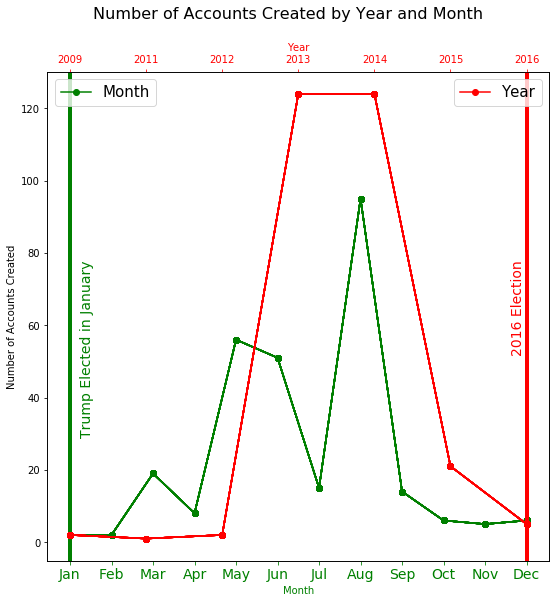

In [48]:
#plot graph about accounts created by time
fig = plt.figure(figsize=(9,9))
fig.suptitle('Number of Accounts Created by Year and Month ', fontsize=16)
axis1 = fig.add_subplot(111)
axis1.plot(months, marker = 'o', color='g')
axis1.set_ylabel('Number of Accounts Created' )
axis1.set_xlabel('Month', color='g')
axis1.tick_params('x', colors='g')
axis1.set_xticklabels(labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize=14)
#Number of Accounts created by year
axis2 = axis1.twiny()
axis2.plot(Years, marker = 'o', color='r')
axis2.set_ylabel('Number of Accounts Created')
axis2.set_xlabel('Year', color='r')
axis2.tick_params('x', colors='r')

axis1.legend(['Month'], loc='upper left', fontsize='15')
axis2.legend(['Year'], loc='upper right', fontsize='15')

axis2.axvline(x='2016', linewidth=4, color='r')
axis2.text(5.8,75,'2016 Election',rotation=90, fontsize='14', color='r')
axis1.axvline(x='01', linewidth=4, color='g')
axis1.text(0.25,75,'Trump Elected in January',rotation=90, fontsize='14', color='g')

#### Account Origin

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text xticklabel objects>)

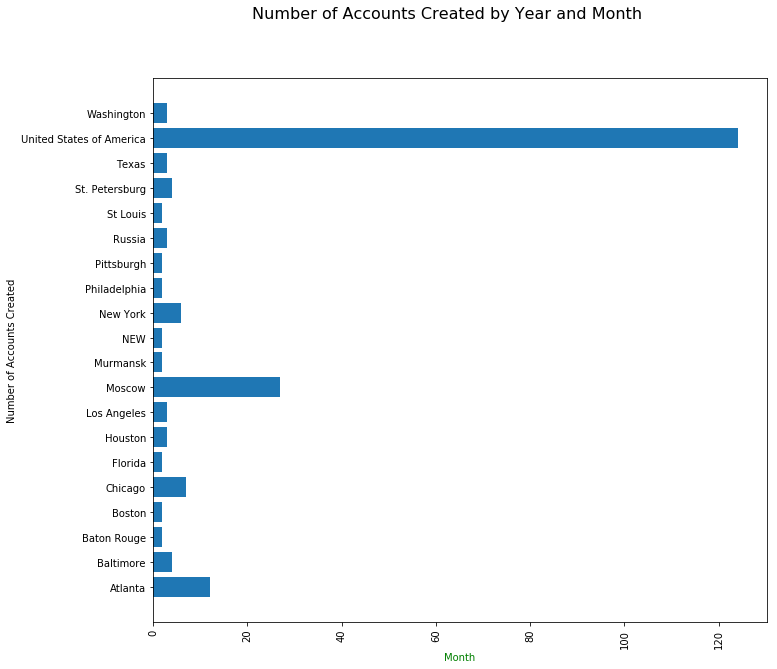

In [49]:
#plot graph about accounts created by time
fig = plt.figure(figsize=(11,10))
fig.suptitle('Number of Accounts Created by Year and Month ', fontsize=16)
axis3 = fig.add_subplot(111)
axis3.barh(twitter_user['location'].value_counts().index[:20], twitter_user['location'].value_counts()[:20])
axis3.set_ylabel('Number of Accounts Created')
axis3.set_xlabel('Month', color='g')
plt.xticks(rotation=90)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 11 Text xticklabel objects>)

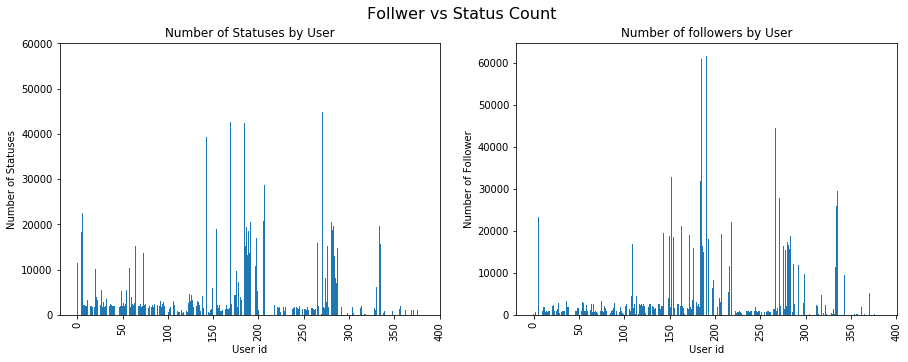

In [50]:
#plot graph on Follower vs Status count
fig = plt.figure(figsize=(15,5))
fig.suptitle('Follwer vs Status Count ', fontsize=16)
axis4 = fig.add_subplot(121)
axis4.bar(twitter_user['statuses_count'].index, twitter_user['statuses_count'])
axis4.set_title('Number of Statuses by User')
axis4.set_ylabel('Number of Statuses')
axis4.set_xlabel('User id')
plt.xticks(rotation=90)
axis5 = fig.add_subplot(122)
axis5.bar(twitter_user['followers_count'].index, twitter_user['followers_count'])
axis5.set_title('Number of followers by User')
axis5.set_ylabel('Number of Follower')
axis5.set_xlabel('User id')
plt.xticks(rotation=90)

In [61]:
#Follower_Count
follower_count_mean = twitter_user['followers_count'].mean()
follower_count_median = twitter_user['followers_count'].median()
print('The average "Russian Troll Account" has:', int(follower_count_mean), 'Followers')
print('The median "Russian Troll Account" has:', int(follower_count_median), 'Followers')
#Status Count
statuses_count_mean = twitter_user['statuses_count'].mean()
statuses_count_median = twitter_user['statuses_count'].median()
print('The average "Russian Troll Account" has:', int(statuses_count_mean), 'statuses')
print('The median "Russian Troll Account" has:', int(statuses_count_median), 'statuses')

The average "Russian Troll Account" has: 4492 Followers
The median "Russian Troll Account" has: 1609 Followers
The average "Russian Troll Account" has: 4911 statuses
The median "Russian Troll Account" has: 1889 statuses


### Twitter Users's Description

(-0.5, 399.5, 199.5, -0.5)

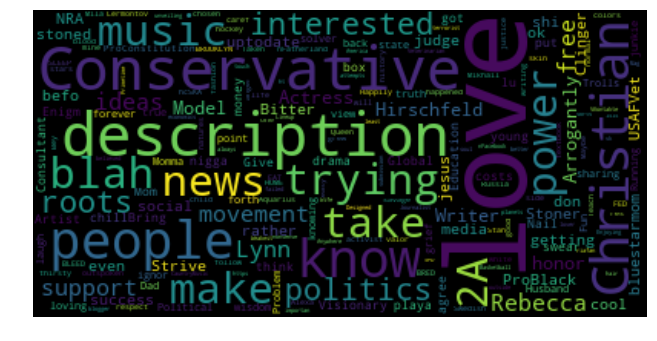

In [52]:
tweet_text = WordCloud().generate(str(twitter_user['description']))
# Display the generated image:
# the matplotlib way:
fig = plt.figure(figsize=(11,10))
axis1 = fig.add_subplot(111)
axis1.imshow(tweet_text, interpolation='bilinear')
axis1.axis("off")

### Tweets data Visualization

In [53]:
date = tweets.groupby(by=[tweets['month_year'].sort_values()]).count()
date.head()

,user_key,created_str,retweet_count,retweeted,favorite_count,text,source,hashtags,expanded_urls,posted,mentions,retweeted_status_id,in_reply_to_status_id,month_year
month_year,,,,,,,,,,,,,,
2014-07,12,12,12,12,12,12,12,12,12,12,12,12,12,12
2014-08,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2014-09,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2014-11,388,388,388,388,388,388,388,388,388,388,388,388,388,388
2014-12,442,442,442,442,442,442,442,442,442,442,442,442,442,442


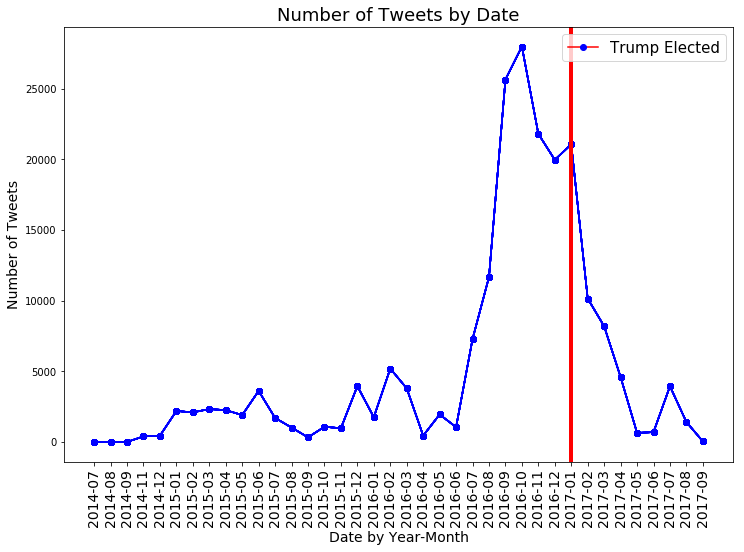

In [62]:
fig = plt.figure(figsize=(12,8))
axis6 = fig.add_subplot(111)
plt.xticks(rotation=90, fontsize='14')
axis6.plot(date, marker = 'o', color='b')
axis6.set_title('Number of Tweets by Date', fontsize='18')
axis6.set_ylabel('Number of Tweets', fontsize='14')
axis6.set_xlabel('Date by Year-Month', fontsize='14')

axis6.axvline(x='2017-01', linewidth=4, color='r', label='2016 Election')

axis6.legend(['Trump Elected'], loc='upper right', fontsize='15')
leg = axis6.get_legend()
leg.legendHandles[0].set_color('red')

#### Retweets count

In [55]:
retweet = tweets['retweet_count'].value_counts().describe()
print("A total of",retweet[0],"have been retweeted")
print("Of the Tweets retweeted, they were retweeted", int(retweet[1]), "times on average")

A total of 1229.0 have been retweeted
Of the Tweets retweeted, they were retweeted 165 times on average


In [56]:
retweet_count = tweets.sort_values(by='retweet_count', ascending=False)['retweet_count'].value_counts()
retweet_count = retweet_count.drop([0]).nlargest(15)

Text(0.5,0,'Number of Retweets')

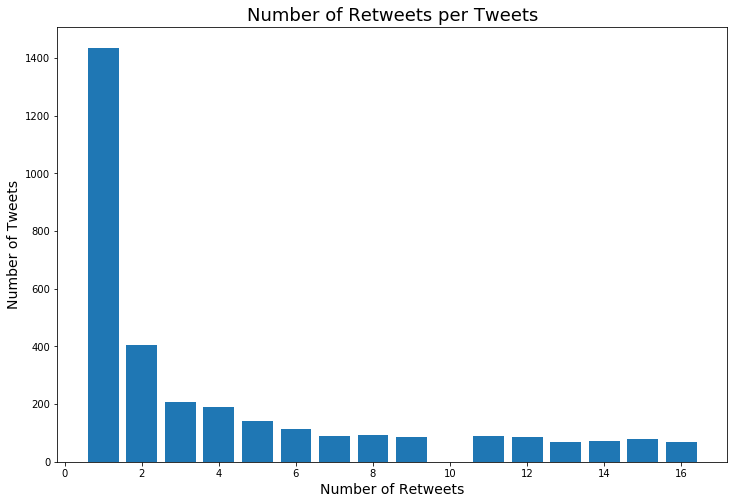

In [57]:
fig = plt.figure(figsize=(12,8))
axis7 = fig.add_subplot(111)
axis7.bar(retweet_count.index, retweet_count.values)
axis7.set_title('Number of Retweets per Tweets', fontsize='18')
axis7.set_ylabel('Number of Tweets', fontsize='14')
axis7.set_xlabel('Number of Retweets', fontsize='14')

Text(0.5,0,'Number of time the Hashtag was Retweeted')

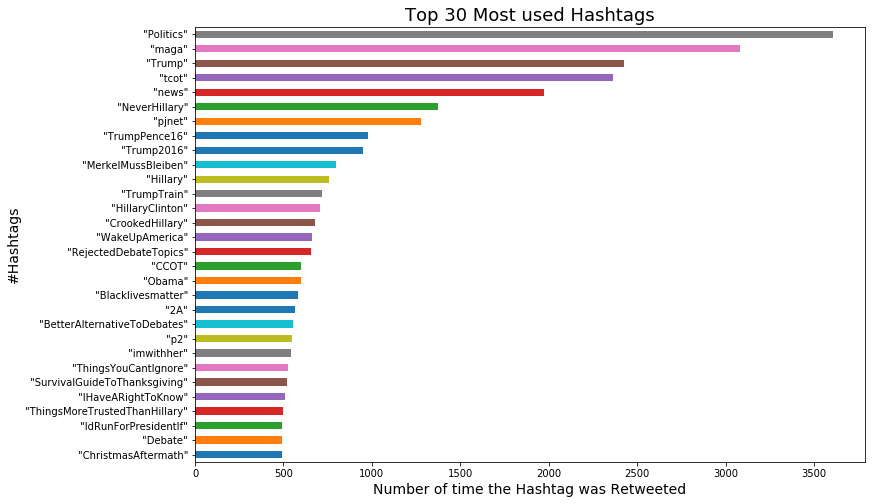

In [58]:
fig = plt.figure(figsize=(12,8))
axis7 = fig.add_subplot(111)
#axis7.barh(top_hashtags.index, top_hashtags.values)
top_hashtags.sort_values(ascending=True).plot.barh()
axis7.set_title('Top 30 Most used Hashtags', fontsize='18')
axis7.set_ylabel('#Hashtags', fontsize='14')
axis7.set_xlabel('Number of time the Hashtag was Retweeted', fontsize='14')

### Most Used Words in Tweets 

(-0.5, 399.5, 199.5, -0.5)

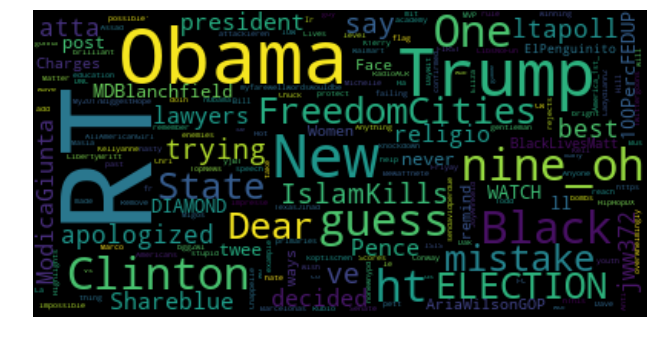

In [59]:
tweet_text = WordCloud().generate(str(tweets['text']))
# Display the generated image:
# the matplotlib way:
fig = plt.figure(figsize=(11,10))
axis1 = fig.add_subplot(111)
axis1.imshow(tweet_text, interpolation='bilinear')
axis1.axis("off")

### Most Used Hashtags

(-0.5, 399.5, 199.5, -0.5)

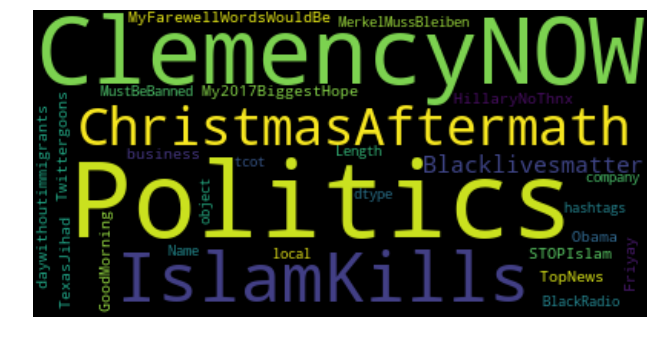

In [60]:
hashtags = WordCloud().generate(str(tweets['hashtags']))
# Display the generated image:
# the matplotlib way:
fig = plt.figure(figsize=(11,10))
axis2 = fig.add_subplot(111)
axis2.imshow(hashtags, interpolation='bilinear')
axis2.axis("off")

### 7. Analyzing Data
---

Before we could begin analyzing the data we had to clean both files. We used the following claning methods:
#### Clean the datatsets: 
* dropna
    * User.csv
        * Dropped and rows that didn't have a location, since most of the data we are presenting is based on location
        * Dropped any remaining rows that didn't have a timezone
    * Tweets.csv
        * Removed unnedded columns such as user_id, created_at and tweet_id
* fillna 
    * User.csv
        * If a user didn't have a description, we filled with a string "no description"
    * Tweets.csv
* replace
    * Tweets.csv
        * Replaced any numerical null values with a zero, for example if a row had null values for retweets_count, retweeted, favorite_count, they were replaced with a 0.

#### Data Wrangling:

* #### Users.csv 
 * The reformat method was used to create the created_str, so that the accounts can be visualized by Month and Year.
 * Google Translate Python was used  to translate the description, location, and usernames to English.  
 * The locations were consolidated to a single name, for example  "US" and "USA" was replaced with "United States of America". So, later it  can visulaize easier and more accurately.
* #### Tweets.csv
 * Created Month-Year column for sorting and plotting. 
 * Cleaned hashtag column to get the top used hashtags.

#### Data Visualization

* #### Users Data Visualization 

1. Visualized the number of accounts created by Month and Year using groupby method.
2. Plotted the bar graph about the accounts created by time and locations.
3. We plotted the number of status by User and number of folowers by User.
4. We used wordcloud to see the most frequent tweet users text

* #### Tweets Data Visualization
1. Visualized the number of tweets by each month ranging from 2014 to 2017. The x-axis was based on the month_year column created earlier to see the number or tweets in relation to the Trump election.
2. A majority of the data for retweets were missing, so when it came to looking at retweets we excluded all tweets with missing data or with 0 retweets. 
3. A great deal of tweets had no hashtags had no hashtags, while some had 45 hashtags. So before visualzing in we flattened the hashtags arrays into a dataframe with a single column.
4. We used a wordcloud to visualize the most popular words for all tweets.

### 8. Reporting Results
---

#### User Data
* From analyizing the user data we were able to see that most of the "Russian Troll accounts" were created in 2013 and 2014, which makes sense as they would like to build an online history and presence. But, NBC did collect some accounts that were created in 2009, We think that is a little to early and the tweets from those accounts should be disreguarded. 
* Next we looked into the origin of the accounts, most of the accounts had their location to the United States of America, or large cities in the US. But, there was a suprisingly large amount of account with their locations set to Russia or Russian cities. 
* We also looked at the amount of statues each account made vs the amount of followers the account has. The trend was that the more followers the account had the more they tweeted. There were a few outliers, with a few accounts with a little amount of follwers tweeting a lot. 
* We created a wordcloud on the most used word, in each user's description. Some of the most used words are:
    * Conservative
    * Love
    * Christian
    * people
    * description
    * power
 
 It was really interesting what descriptive words were used in each account's description. Just, by looking at the word could it was obvious that the accounts created were either conservative or geared towards conservatives
 
#### Tweets Data
* First we visualized when most of the ~300,000 tweets collected were tweeted. We predicted that most of the tweets would come around Trumps election on January 20th. But, looking at the data there were 19,965 tweets in Dec. 2016, 21,067 in Jan. 2017 and 10,151 in Feb. of 2017, which was close to the most tweets. But, October 2016 saw of majority of the tweets, this could have been due to the tape of Trump speaking lewdly of women coming out right before the election. 
* When it came to retweets, most of the data was missing, so we replaced the null values with 0's, so when it came to retweets we only looked at the tweets with any amount of retweets. Of the tweets with retweets a majority (1400 tweets) only had 1 retweets. While the next 1400 tweets received 2-6 retweets. 
* Hashtags are used on Twitter to speard a tweet based on a phrases, ideas or people. In this case the most popular hashtags were "politics", "maga", "Trump", "tcot" (top conservative on twitter). From, the hashtags we can see that a majority were pro-Trump and anit-Hillary as a majority had postive hashtags about Trump. While, there were a lot of less popular hashtags towards Hillary, for example "NeverHillary", "CrookedHillary", and "ThingsMoreTrustedThanHillary".
* We also created a wordcloud to visualized hashtags in a different way.
* After dissecting the hashtags, we looked directly at the actually tweet. We created wordcloud based on the most used words in all of the tweets. The most used words include "RT", "Trump", "Obama", "New", "Election" and "FreedomCities."

### 9. Conclusion
---

Using an array of methods and tools, we were able to clean, wrangle and visualize the 300,000 tweets and 3,000 accounts compiled by NBC. By, visualizing this data we were able to analyize the data and gain a better understanding of what the data means. 
#### Lesson Learned
From conducting this project we learned first and formost how important it is to understand the dataset that you are working with. It is important to know what each column and row stands for, before you start cleaning and wrangling data. Another lesson we learned is that making a plan of what you want to visualize, will make your life much easier when it comes to data wrangling. 

### 10. References

* https://www.kaggle.com/vikasg/russian-troll-tweets
* https://github.com/amueller/word_cloud
* https://pypi.org/project/googletrans/